In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig

%matplotlib inline

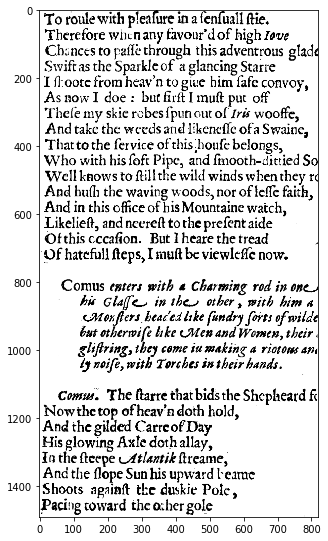

(1491, 821)


In [3]:
img = cv.imread("anon_blank_blank_00height_amaske-6914_page1r.tif", 0)
plt.figure(figsize=(5,10))
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

In [4]:
sumMatrix = np.sum(255 - img, 1)
print(sumMatrix.shape)

(1491,)


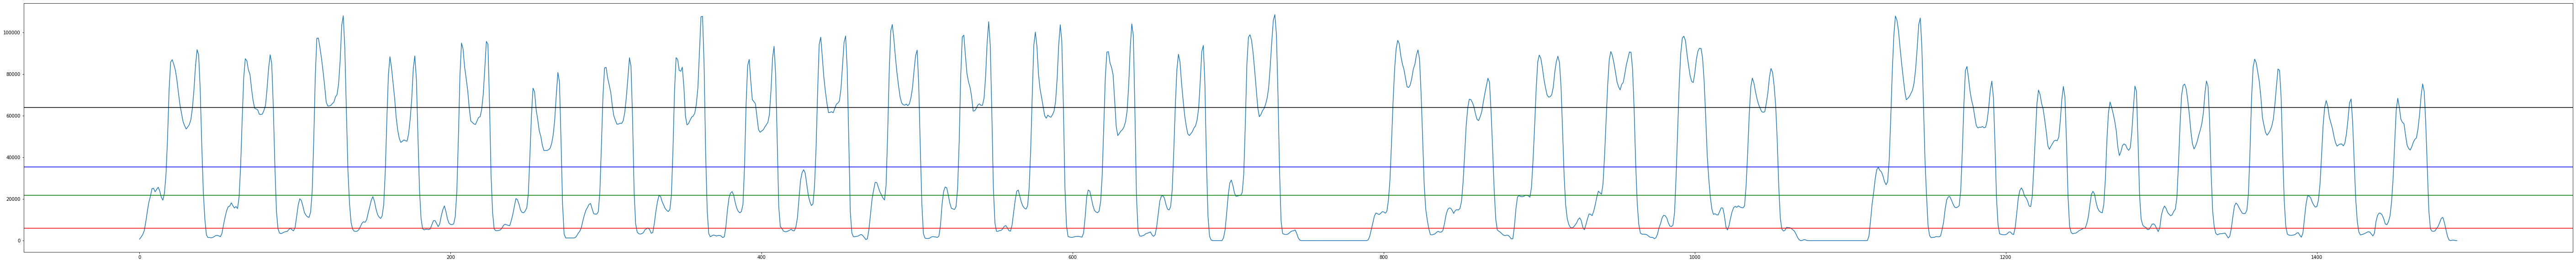

In [5]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
plt.axhline(y=np.percentile(sumMatrix, 25), color="red")
plt.axhline(y=np.percentile(sumMatrix, 50), color="green")
plt.axhline(y=np.percentile(sumMatrix, 75), color="black")
plt.axhline(y=np.mean(sumMatrix), color="blue")
plt.show()

In [6]:
peaks, _ = sig.find_peaks(-sumMatrix)
print(peaks)

[  10   15   30   47   61   78   92   99  109  122  139  155  168  171
  184  192  200  215  230  246  261  277  293  307  310  322  329  340
  347  352  371  386  399  416  420  432  444  467  478  492  506  523
  536  552  559  570  584  601  615  629  644  652  661  675  689  697
  705  720  737  746  789  801  816  831  845  860  882  889  894  906
  921  928  939  952  974  984  998 1013 1021 1044 1057 1067 1070 1111
 1123 1136 1154 1168 1182 1186 1198 1205 1215 1228 1233 1244 1261 1273
 1279 1291 1298 1306 1321 1336 1343 1353 1368 1384 1389 1399 1413 1417
 1428 1436 1445 1460 1475 1487]


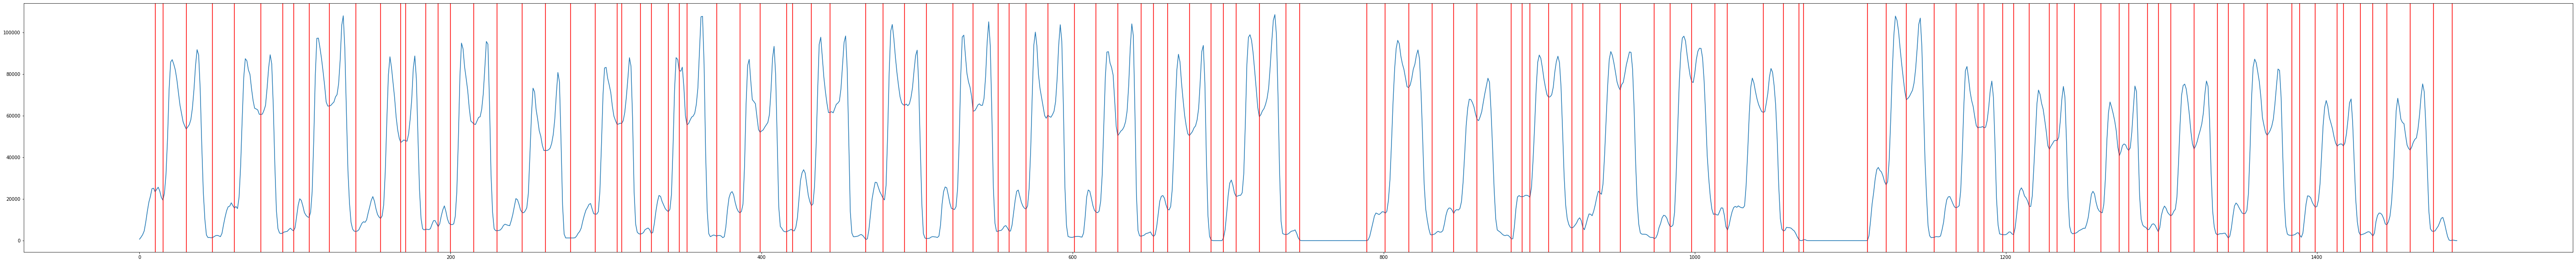

In [7]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in peaks:
    plt.axvline(x=col, color="red")
plt.show()

In [8]:
proms = sig.peak_prominences(-sumMatrix, peaks)[0]
print(proms)

[2.04800000e+03 8.19200000e+03 3.27680000e+04 9.01120000e+04
 2.04800000e+03 2.66240000e+04 8.60160000e+04 8.60160000e+04
 1.02400000e+04 3.27680000e+04 9.21600000e+04 1.02400000e+04
 4.09600000e+04 4.09600000e+04 8.19200000e+04 8.19200000e+04
 8.19200000e+03 3.89120000e+04 7.57760000e+04 6.14400000e+03
 3.07200000e+04 1.06496000e+05 6.14400000e+03 2.86720000e+04
 2.86720000e+04 8.39680000e+04 8.39680000e+04 8.19200000e+03
 2.04800000e+03 3.27680000e+04 9.62560000e+04 1.02400000e+04
 3.68640000e+04 9.01120000e+04 9.01120000e+04 1.84320000e+04
 3.68640000e+04 1.08544000e+05 8.19200000e+03 2.66240000e+04
 1.08544000e+05 1.22880000e+04 3.68640000e+04 1.00352000e+05
 1.00352000e+05 1.02400000e+04 4.09600000e+04 1.02400000e+05
 1.02400000e+04 3.89120000e+04 9.21600000e+04 9.21600000e+04
 8.19200000e+03 3.89120000e+04 1.08544000e+05 1.06496000e+05
 8.19200000e+03 3.89120000e+04 4.09600000e+03 1.84467441e+19
 1.84467441e+19 2.04800000e+03 1.84320000e+04 7.57760000e+04
 4.09600000e+03 1.024000

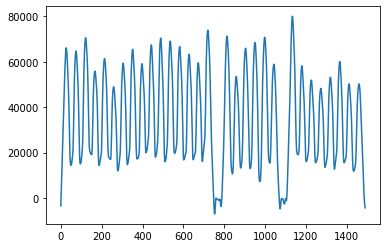

In [9]:
smooth = sig.savgol_filter(sumMatrix, 51, 3)
plt.plot(np.arange(0, smooth.shape[0]), smooth.transpose())
plt.show()

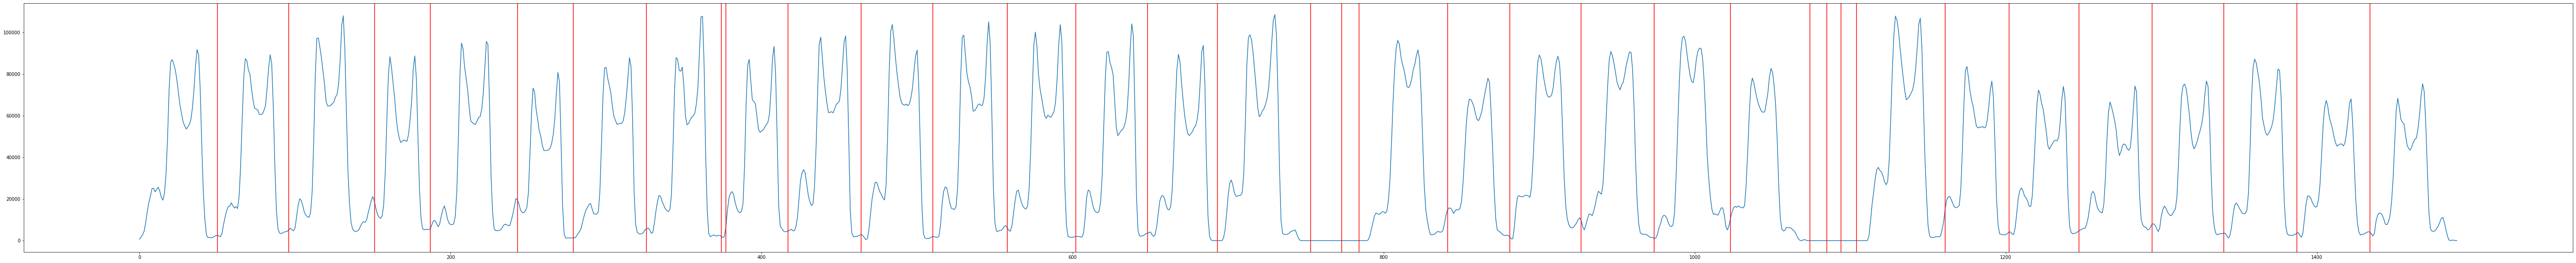

In [10]:
troughs, _ = sig.find_peaks(-smooth)
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in troughs:
    plt.axvline(x=col, color="red")
plt.show()

In [11]:
heights = np.zeros(len(troughs) - 1)
for i in np.arange(0,len(troughs) - 1 ):
    start = troughs[i]
    end = troughs[i+1]
    
    #fig, axs = plt.subplots(2, 1, constrained_layout = True)

    cutLine = img[start:end,:]
    heights[i] = end-start
    print(end - start)
    #axs[1].imshow(cutLine, cmap="gray")
    #axs[0].plot(np.arange(0, cutLine.shape[0]), np.sum(255 - cutLine, axis=1))
    #plt.show()

46
55
36
56
36
47
48
3
40
47
46
48
44
46
45
60
20
11
57
40
46
47
49
51
11
9
10
57
41
45
47
46
47
47


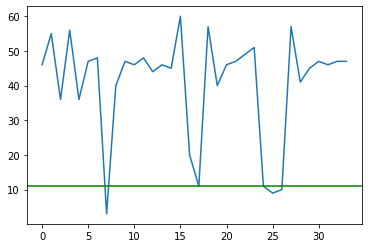

In [12]:
plt.plot(np.arange(0, heights.shape[0]), heights.transpose())
plt.axhline(y=np.percentile(heights, 10), color="green")
plt.show()

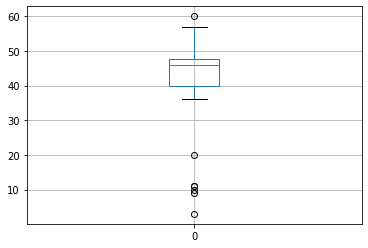

In [13]:
df = pd.DataFrame(heights)
df.boxplot()

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
 False False False  True  True  True  True  True  True  True]
(34,)
(35,)
46


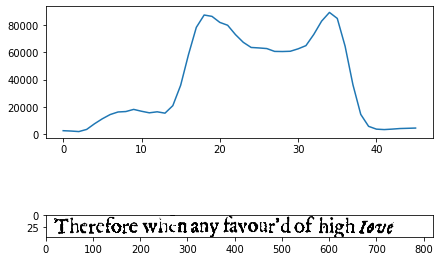

55


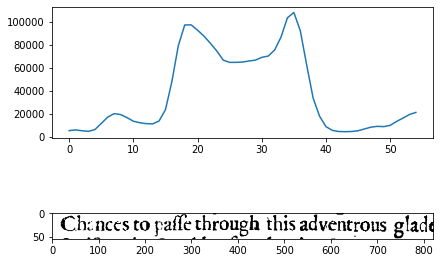

36


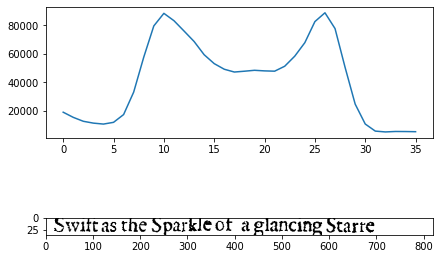

56


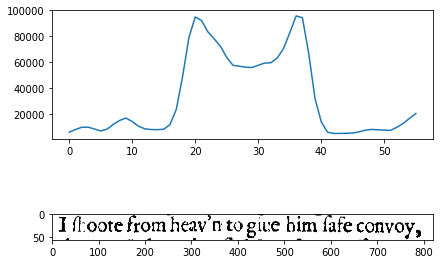

36


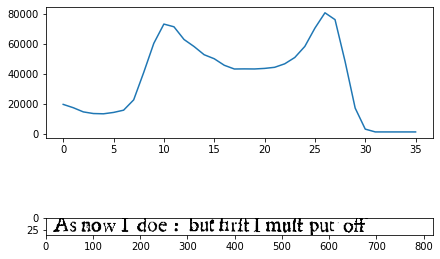

47


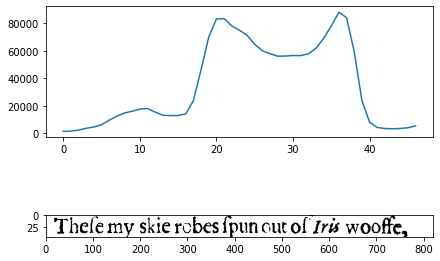

48


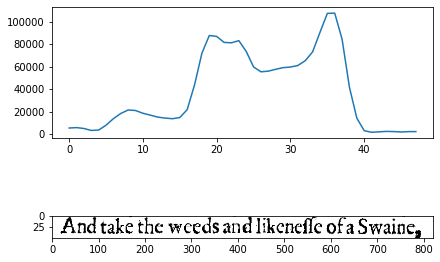

43


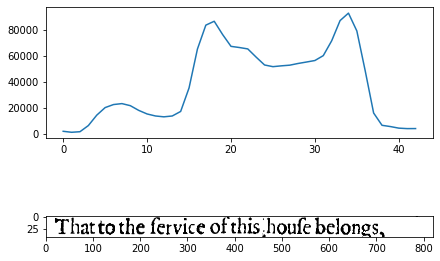

47


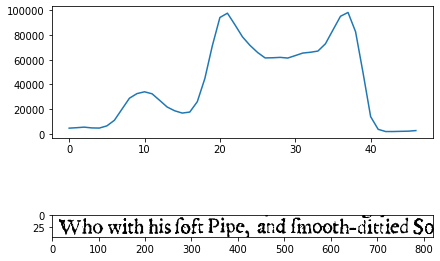

46


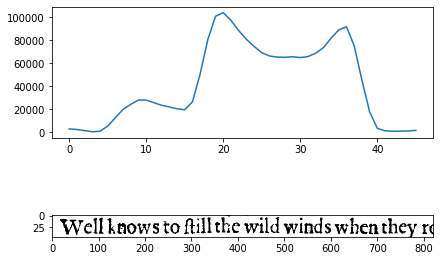

48


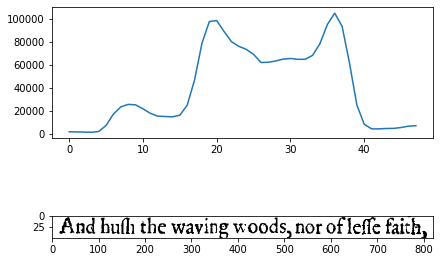

44


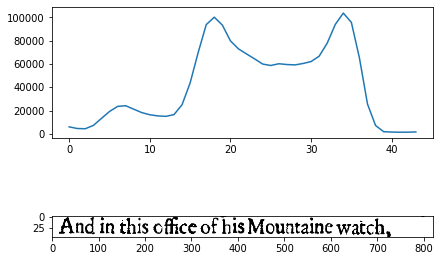

46


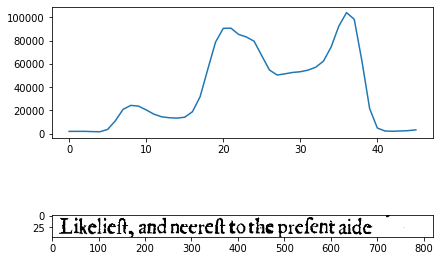

45


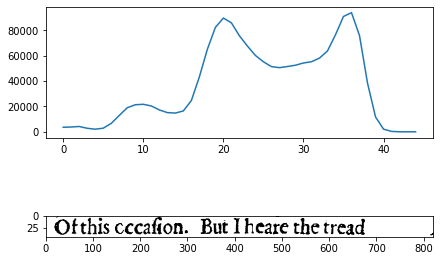

60


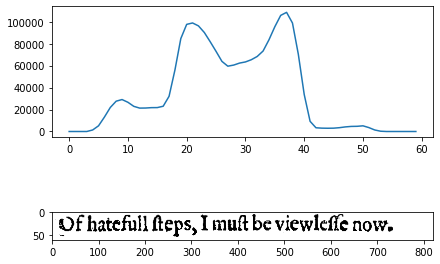

88


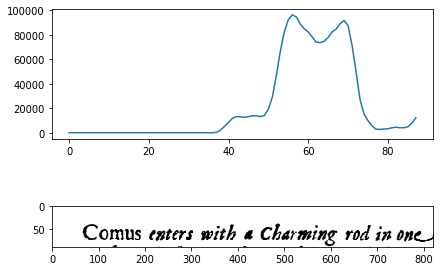

40


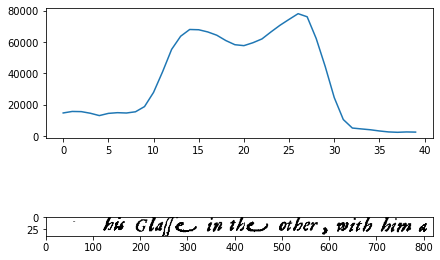

46


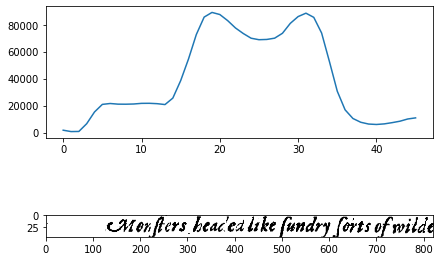

47


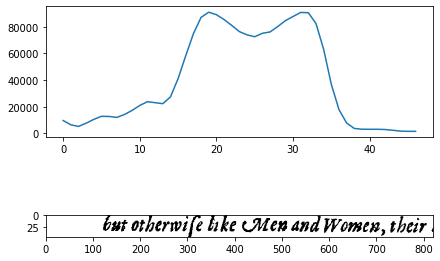

49


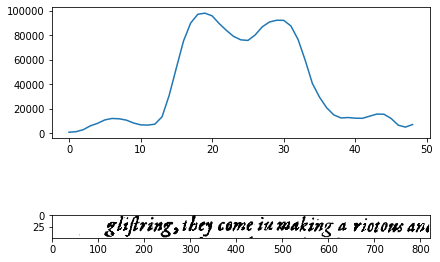

51


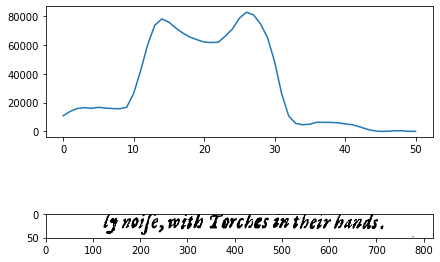

87


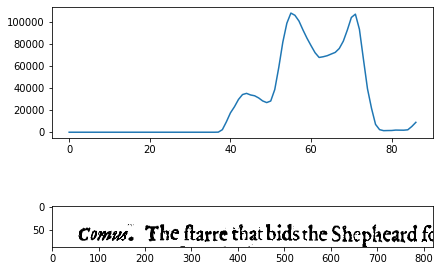

41


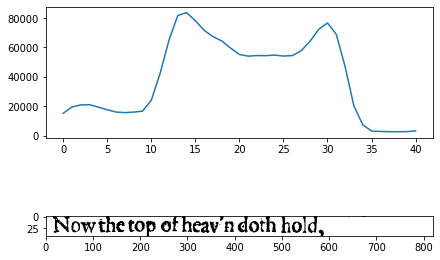

45


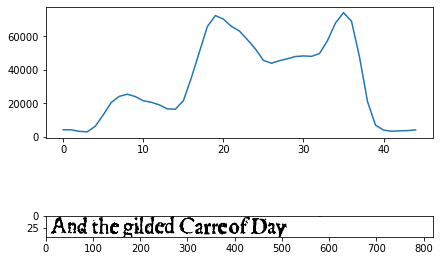

47


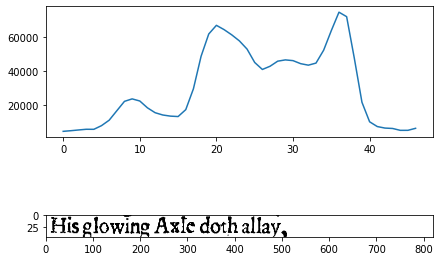

46


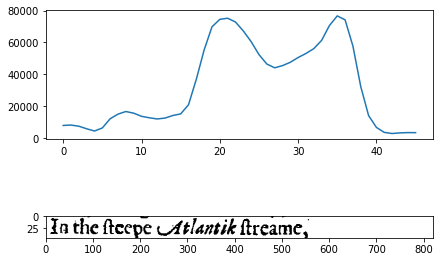

47


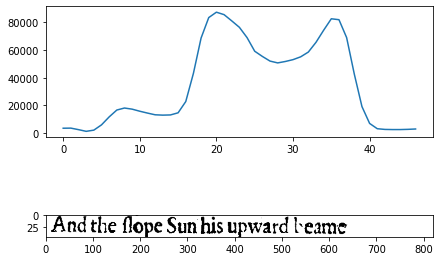

47


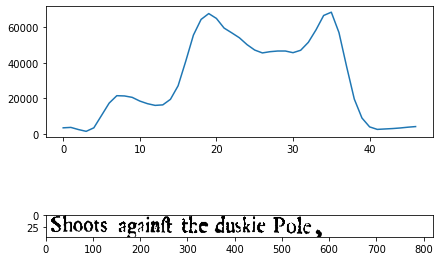

(29,)
[  50   96  151  187  243  279  326  374  417  464  510  558  602  648
  693  753  841  881  927  974 1023 1074 1161 1202 1247 1294 1340 1387
 1434]


In [24]:
trimHeights = abs(heights - np.median(heights)) < 1.5 * np.std(heights)
print(trimHeights)
print(trimHeights.shape)

trimTroughs = troughs
print(trimTroughs.shape)
i = 0
while i < trimTroughs.shape[0] - 1:
#for i in np.arange(0,len(trimTroughs) - 1 ):
    if(not trimHeights[i]):
        trimTroughs = np.delete(trimTroughs, i+1, 0)
        trimHeights = np.delete(trimHeights, i, 0)
        #i -= 1
        continue
    start = trimTroughs[i]
    end = trimTroughs[i+1]
    
    fig, axs = plt.subplots(2, 1, constrained_layout = True)

    cutLine = img[start:end,:]
    print(end - start)
    axs[1].imshow(cutLine, cmap="gray")
    axs[0].plot(np.arange(0, cutLine.shape[0]), np.sum(255 - cutLine, axis=1))
    plt.show()
    i+=1
        
print(trimTroughs.shape)
print(trimTroughs)